In [1]:
import numpy as np
import math
import time
from datetime import datetime, timezone
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
subjects_as_ints = [3509524, 5132496, 1066528, 5498603, 2638030, 2598705,
                    5383425, 1455390, 4018081, 9961348,1449548, 8258170,
                    781756, 9106476, 8686948, 8530312, 3997827, 4314139,
                    1818471, 4426783, 8173033, 7749105, 5797046, 759667,
                    8000685, 6220552, 844359, 9618981, 1360686, 46343,
                    8692923]

subjects_as_ints_min = [3509524, 5132496]

datetime_string = "2023-12-10 22:00:00"
dt = datetime.strptime(datetime_string, "%Y-%m-%d %H:%M:%S")
BASE_TIME = int(dt.replace(tzinfo=timezone.utc).timestamp())

In [3]:
def read_all_sleep_labels(subjects):
    df = pd.DataFrame()
    for sub_id in subjects:
        sub_data = read_sleep_labels(sub_id)
        df = pd.concat([df, sub_data], ignore_index=True)
    return df

def read_sleep_labels(sub_id):
    data = pd.read_csv('data/labels/' + str(sub_id) + '_labeled_sleep.txt', delimiter=' ').values
    time = data[:,0]
    time = BASE_TIME + time
    time = pd.to_datetime(time, unit='s')
    df = pd.DataFrame({'time': time, 'sleep': data[:,1], 'ID': sub_id})
    return df

In [4]:
labels = read_all_sleep_labels(subjects_as_ints)
print(labels.head())
print(len(labels))
print(labels.isnull().sum())

                 time  sleep       ID
0 2023-12-10 22:00:30      0  3509524
1 2023-12-10 22:01:00      0  3509524
2 2023-12-10 22:01:30      0  3509524
3 2023-12-10 22:02:00      0  3509524
4 2023-12-10 22:02:30      0  3509524
27180
time     0
sleep    0
ID       0
dtype: int64


In [5]:
def check_count(X):
    unique_values, counts = np.unique(X, return_counts=True)

    # Display the counts for each unique value
    for value, count in zip(unique_values, counts):
        print(f"Value {value} appears {count} times. percentage: {round(count*100 / len(X), 2)}")

In [6]:
check_count(labels['sleep'])

Value -1 appears 418 times. percentage: 1.54
Value 0 appears 2418 times. percentage: 8.9
Value 1 appears 1821 times. percentage: 6.7
Value 2 appears 12954 times. percentage: 47.66
Value 3 appears 3329 times. percentage: 12.25
Value 4 appears 356 times. percentage: 1.31
Value 5 appears 5884 times. percentage: 21.65


In [9]:
# Remove class -1
labels = labels[(labels['sleep'] != -1)]
check_count(labels['sleep'])
print(len(labels))

Value 0 appears 2418 times. percentage: 9.04
Value 1 appears 1821 times. percentage: 6.8
Value 2 appears 12954 times. percentage: 48.4
Value 3 appears 3329 times. percentage: 12.44
Value 4 appears 356 times. percentage: 1.33
Value 5 appears 5884 times. percentage: 21.99
26762


In [11]:
for _, (subject_id, subject_data) in enumerate(labels.groupby('ID')):
    diff = subject_data['time'].diff()
    print('Average difference: {}'.format(diff.mean()))

Average difference: 0 days 00:00:30
Average difference: 0 days 00:00:30
Average difference: 0 days 00:00:30
Average difference: 0 days 00:00:30
Average difference: 0 days 00:00:30
Average difference: 0 days 00:00:30
Average difference: 0 days 00:00:30.031512605
Average difference: 0 days 00:00:30
Average difference: 0 days 00:00:30
Average difference: 0 days 00:00:30
Average difference: 0 days 00:00:30
Average difference: 0 days 00:00:30
Average difference: 0 days 00:00:30
Average difference: 0 days 00:00:30
Average difference: 0 days 00:00:30
Average difference: 0 days 00:00:30
Average difference: 0 days 00:00:30
Average difference: 0 days 00:00:30.061601642
Average difference: 0 days 00:00:30
Average difference: 0 days 00:00:30.031982942
Average difference: 0 days 00:00:30
Average difference: 0 days 00:00:30
Average difference: 0 days 00:00:30.031380753
Average difference: 0 days 00:00:30
Average difference: 0 days 00:00:30
Average difference: 0 days 00:00:30.063424947
Average differ

In [12]:
labels.to_csv('labels.csv', index=False)

<ipython-input-13-d38941accca1>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


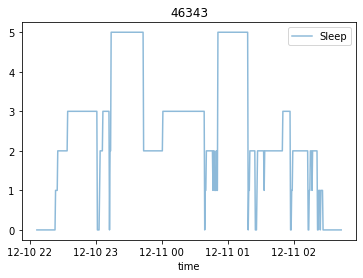

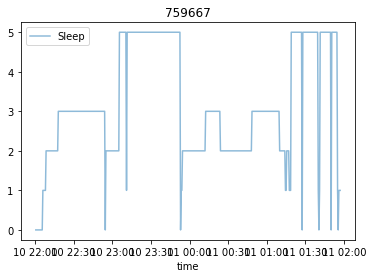

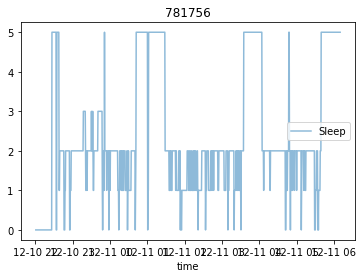

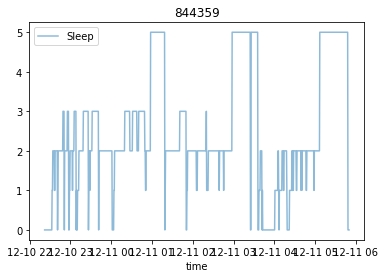

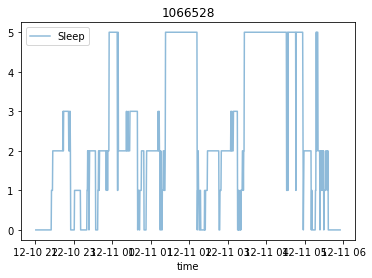

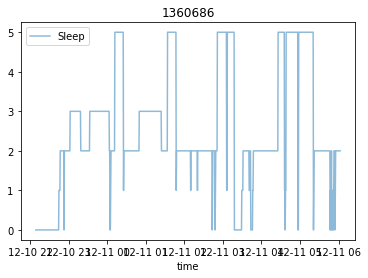

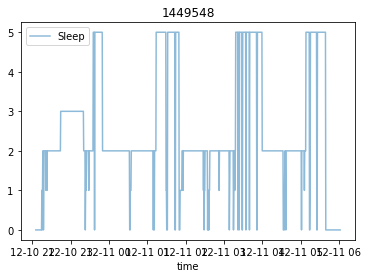

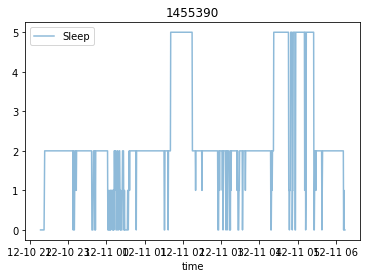

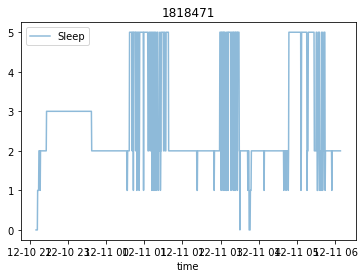

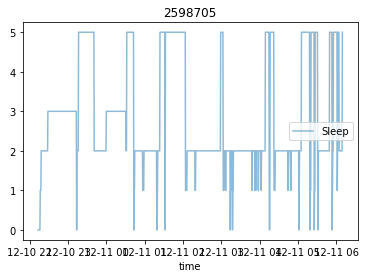

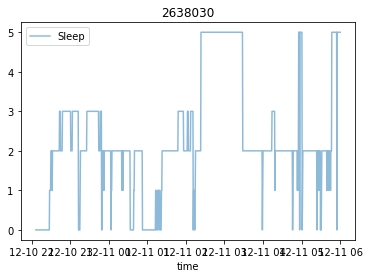

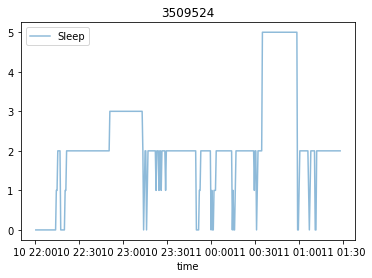

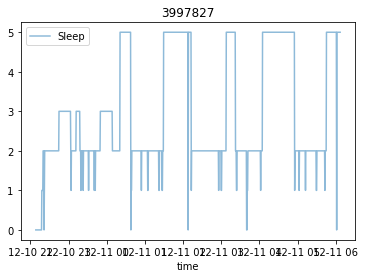

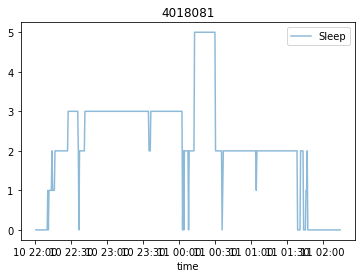

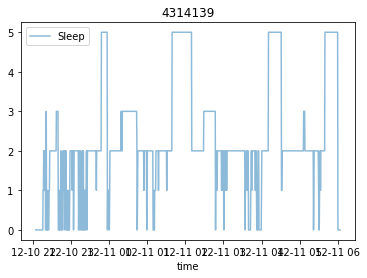

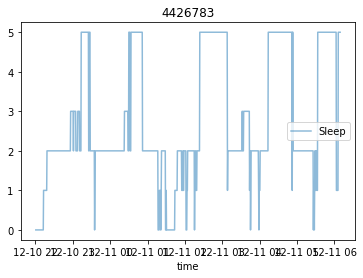

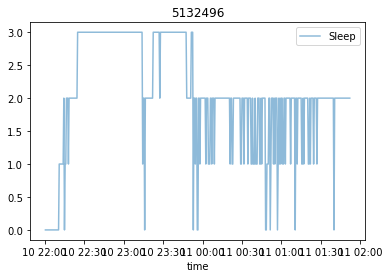

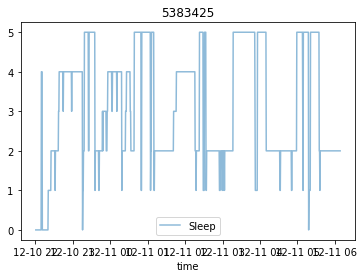

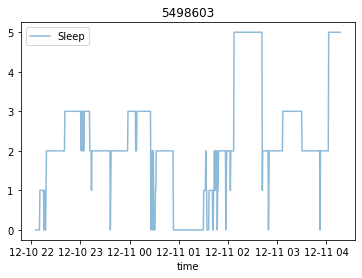

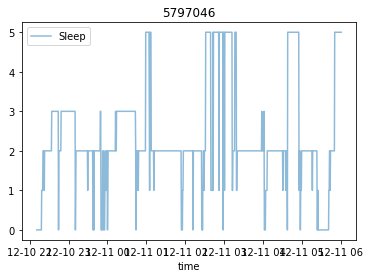

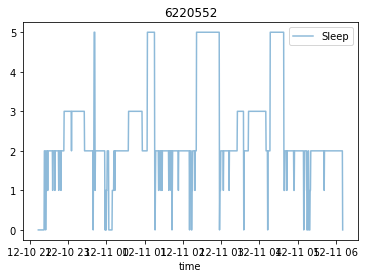

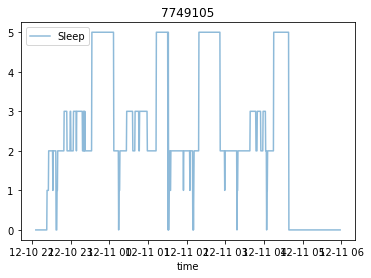

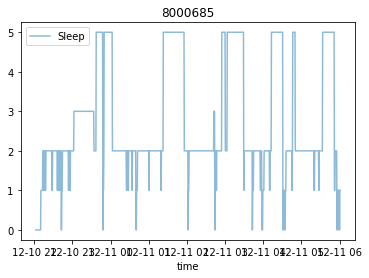

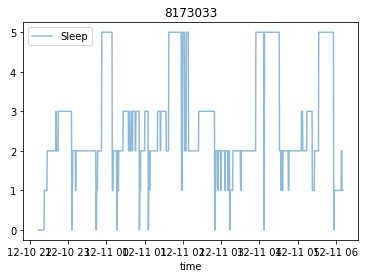

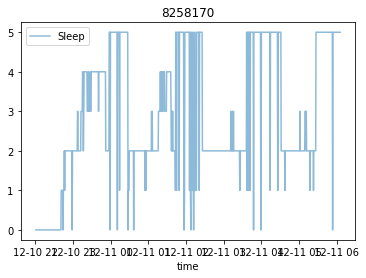

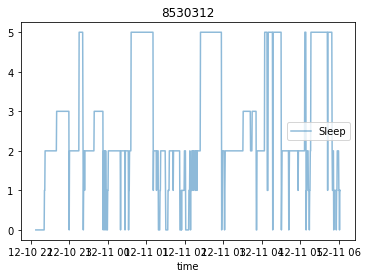

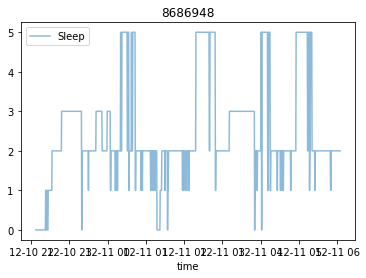

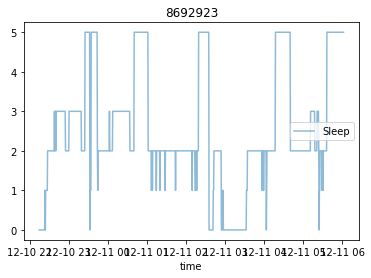

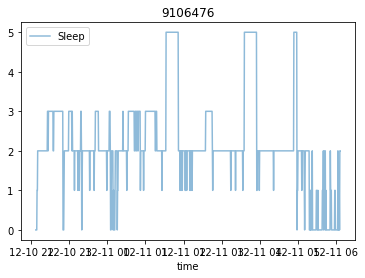

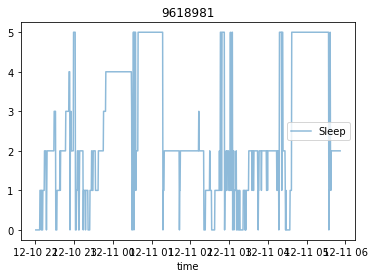

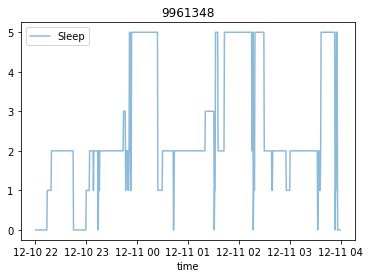

In [13]:
for _, (subject_id, data) in enumerate(labels.groupby('ID')):
    plt.figure()
    plt.plot(data['time'], data['sleep'], label='Sleep', alpha=0.5)
    plt.xlabel('time')
    plt.title(subject_id)
    plt.legend()

plt.show()